# 整体分析框架

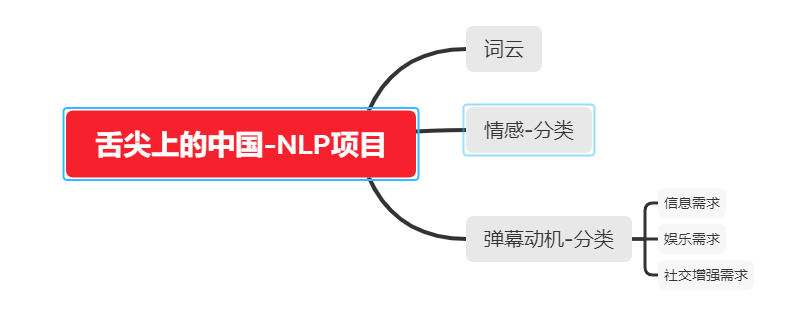

# EDA（探索性数据分析）

In [1]:
import json

部分数据

In [3]:
# with open("comment_data.json", "r", encoding="utf-8-sig") as f:
#     data = json.load(f) 

全部数据

In [2]:
with open("danmuku.json", "r", encoding="utf-8-sig") as f:
    data = json.load(f) 

In [3]:
# data

舌尖上的中国（第一季）-- 数据

In [3]:
data[0]['comment'][0]['comment'].keys()

dict_keys(['250827076', '250828130', '250828850', '250829838', '250830820', '250912514', '250832329'])

In [4]:
session_1 = data[0]['comment'][0]['comment']['250827076'] + \
            data[0]['comment'][0]['comment']['250828130'] + \
            data[0]['comment'][0]['comment']['250828850'] + \
            data[0]['comment'][0]['comment']['250829838'] + \
            data[0]['comment'][0]['comment']['250830820'] + \
            data[0]['comment'][0]['comment']['250912514'] + \
            data[0]['comment'][0]['comment']['250832329']

舌尖上的中国（第二季）-- 数据

In [5]:
data[1]['comment'].keys()

dict_keys(['228982363', '228983151', '228981633', '228984483', '228985052', '228983787', '228986100'])

In [6]:
session_2 = data[1]['comment']['228982363'] + \
            data[1]['comment']['228983151'] + \
            data[1]['comment']['228981633'] + \
            data[1]['comment']['228984483'] + \
            data[1]['comment']['228985052'] + \
            data[1]['comment']['228983787'] + \
            data[1]['comment']['228986100']

舌尖上的中国（第三季）-- 数据

In [7]:
data[2]['comment'].keys()

dict_keys(['231832255', '231833005', '231833786', '231834730', '231835568', '231836208', '231837057', '231837906'])

In [14]:
session_3 = data[2]['comment']['231832255'] + \
            data[2]['comment']['231833005'] + \
            data[2]['comment']['231833786'] + \
            data[2]['comment']['231834730'] + \
            data[2]['comment']['231835568'] + \
            data[2]['comment']['231836208'] + \
            data[2]['comment']['231837057'] + \
            data[2]['comment']['231837906']

# 句子--高频统计

作用：判断是否是观众刷屏

In [8]:
from collections import Counter

In [9]:
def counter(arr):
    return Counter(arr).most_common(2) # 返回出现频率最高的两个数

# 结果：[(2, 3), (1, 2)]

In [10]:
counter(session_1)

[('多谢款待', 2113), ('感谢袁爷爷', 388)]

In [ ]:
session_1 

# 词向量

In [11]:
import gensim
import jieba
from gensim.models.word2vec import Word2Vec
from gensim.models import word2vec
from tqdm import tqdm
from scipy.linalg import norm
import numpy as np

部分数据

In [15]:
# all_data = data['228982363'] + data['228983151'] + data['228981633'] + data['228984483'] + data['228985052'] + data['228983787'] + data['228986100']

In [15]:
all_data = session_1 + session_2 + session_3

In [16]:
# 数据预处理
train_data_preprocess_result = []
for i in tqdm(all_data):
    i = jieba.lcut(i)  # jieba分词
    train_data_preprocess_result.append(i)

  0%|                                                                                       | 0/132421 [00:00<?, ?it/s]Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\zyt\AppData\Local\Temp\jieba.cache
Loading model cost 0.421 seconds.
Prefix dict has been built successfully.
100%|███████████████████████████████████████████████████████████████████████| 132421/132421 [00:04<00:00, 27808.72it/s]


In [17]:
# 训练词向量
model = Word2Vec()
model.build_vocab(train_data_preprocess_result)
# 输入模型的数据形式train_data_preprocess_result
# size词向量的维度
model = word2vec.Word2Vec(train_data_preprocess_result, vector_size=100, hs=1, min_count=0, window=3)
model.save('word2vec.model')

In [18]:
model = word2vec.Word2Vec.load('word2vec.model')  # 加载word2vec模型

In [19]:
model.wv.most_similar("蜜蜂",topn=10)

[('猪', 0.8504595160484314),
 ('关公', 0.8455193638801575),
 ('杂菌', 0.8200035691261292),
 ('米虫', 0.81128990650177),
 ('摄影机', 0.8093392252922058),
 ('鸟', 0.8089057803153992),
 ('刀来', 0.8087220191955566),
 ('小太', 0.7998195290565491),
 ('丁仪', 0.7943287491798401),
 ('小黄鱼', 0.7933689951896667)]

In [11]:
model.wv["蜜蜂"]

array([-0.47469592,  0.11921004,  0.1804109 ,  0.1832177 , -0.10152715,
       -0.4202993 ,  0.5119031 ,  0.84842926,  0.05336957, -0.66269636,
       -0.72598636, -1.0315379 , -0.41466892, -0.76596385,  0.35331708,
       -0.41023487, -0.16148743, -0.18980117, -0.02115108,  0.3952283 ,
       -0.22041342,  0.48259386, -0.03299113, -0.06155793, -0.12363589,
       -0.02038909, -0.44437948, -0.2660719 , -0.39160514,  0.03287736,
        0.7445869 ,  0.03398328, -0.01389881, -0.15250745,  0.03810698,
        0.20404825, -0.07930269,  0.0685062 ,  0.1258113 , -0.81039774,
        0.26746133,  0.11958722, -0.4998687 ,  0.42261583,  0.4863375 ,
       -0.02778026, -0.42053777,  0.0785479 ,  0.26566502, -0.36415544,
        0.40673047, -0.521555  ,  0.6441669 ,  0.408056  , -0.48788798,
        0.28531164, -0.01007118, -0.6819021 , -0.00273977,  0.5456504 ,
        0.13147664,  0.64459485, -0.35306752, -0.49756926,  0.18315656,
       -0.33638397, -0.500646  ,  0.45933017, -0.25140432, -0.41

# 句向量

In [20]:
def sentence_to_vector(sentence):
    """句子 向量化"""
    sentence = jieba.lcut(sentence)
    sentence_vector = np.zeros(100)  # 创建100维度的0向量
    for word in sentence:
        sentence_vector += model.wv[word]  # 执行 word embedding 操作
    sentence_vector /= len(sentence)
    return sentence_vector  # 数据类型：列表(向量)

In [21]:
def sentence_similarity(sentence1,sentence2):
    """句子 相似度 计算"""
    sentence1 = sentence_to_vector(sentence1)
    sentence2 = sentence_to_vector(sentence2)
    result = np.dot(sentence1, sentence2) / (norm(sentence1) * norm(sentence2))
    return result

In [22]:
sentence = "蜜蜂：蜜蜂：我谢谢你我谢谢你"
# sentence1 = "蜜蜂：我谢谢你"

sentence1 = "看完之后几年了，麦客这里是影响最深刻的一段"

In [24]:
#句子的相似度结果
print(sentence_similarity(sentence,sentence1))

0.5393714567350724


In [ ]:
all_data

In [27]:
database_sentence_vector = {}

for i in tqdm(all_data):
    j = sentence_to_vector(i)
    database_sentence_vector[i] = j


100%|███████████████████████████████████████████████████████████████████████| 132421/132421 [00:06<00:00, 20203.00it/s]


# 分类目标

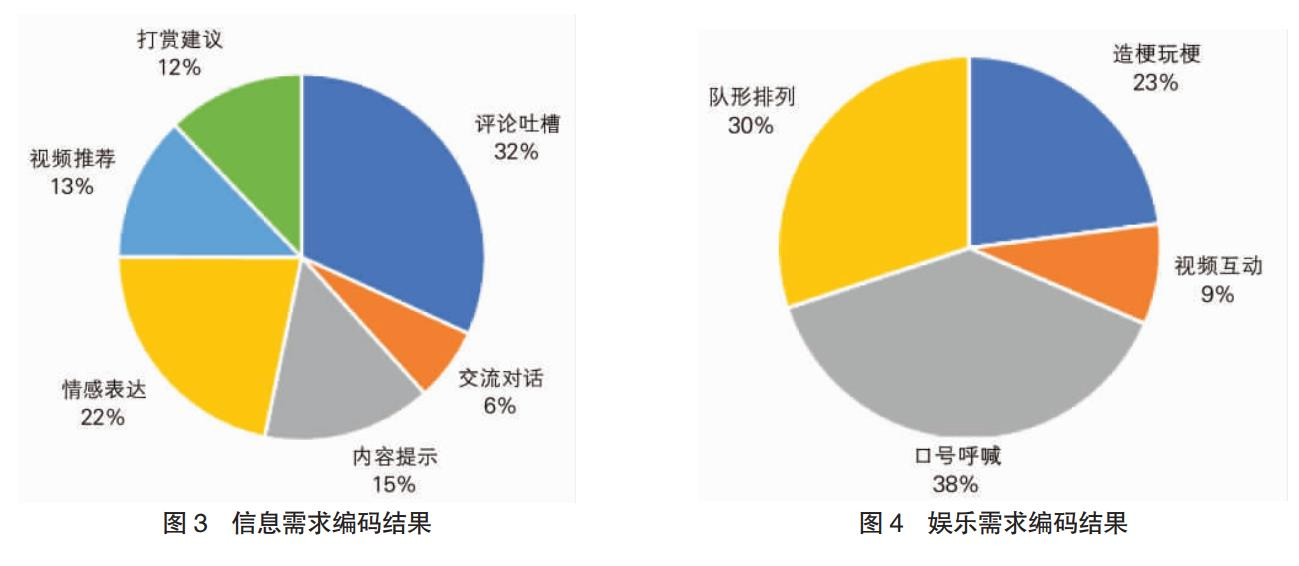

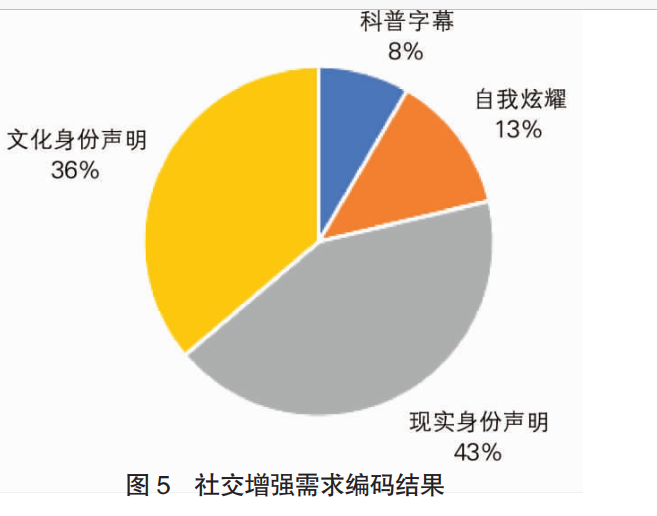

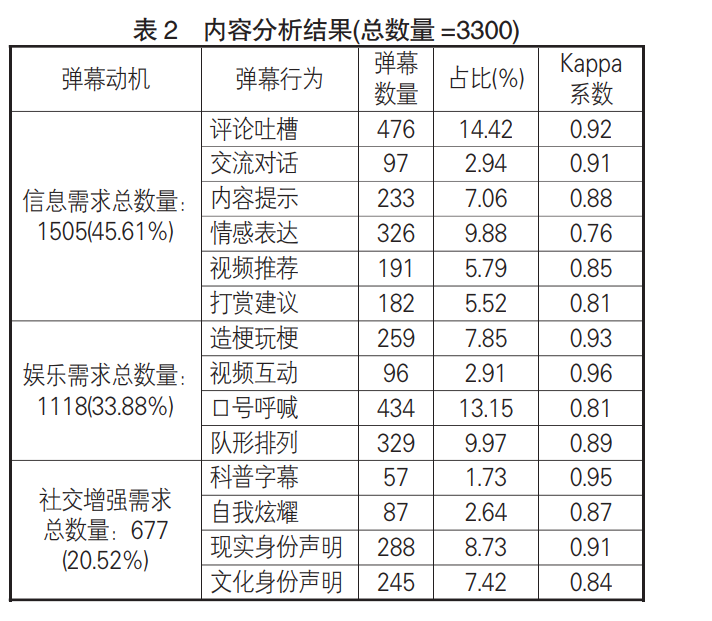

# 句子分类

使用Fasttext进行句子分类

In [49]:
import pandas as pd

In [118]:
cl_data = pd.read_excel('classification.xlsx')

In [119]:
cl_data

,动机,弹幕分类,弹幕内容
0,信息,评论吐槽,小黄鱼：+C2:C17？？？你礼貌吗
1,信息,评论吐槽,羊：开溜
2,信息,评论吐槽,夺笋呐
3,信息,评论吐槽,材料专业除外！！！
4,信息,评论吐槽,狗子看了都摇头
...,...,...,...
94,社交,文化身份声明,不知道是我吃的不正宗还是什么 西湖醋鱼真的难吃 腥的一批
95,社交,文化身份声明,文案吸引我
96,社交,文化身份声明,自然因素：1光照充足 2温度高 3降水量大 4昼夜温差大
97,社交,文化身份声明,天目山在杭州


In [126]:
import random

In [128]:

train_data = []

for i,j in zip(list(cl_data['动机']), list(cl_data['弹幕内容'])):
    j = jieba.lcut(str(j))
    train_data.append("__label__" + i + "  " + " ".join(j))  # 标签放在前面
    
    
random.shuffle(train_data)    #做乱序处理，使得同类别的样本不至于扎堆

with open("train_data.txt", "w", encoding="utf-8") as f:
    for sentence in train_data:
        f.write(sentence+"\n")


In [130]:
from fasttext import train_supervised  # fasttext有监督训练模块

In [131]:
# 测试集
test_data = []

for i,j in zip(list(cl_data['动机']), list(cl_data['弹幕内容'])):
    j = jieba.lcut(str(j))
    test_data.append("__label__" + i + "  " + " ".join(j))  # 标签放在前面
    
    
random.shuffle(test_data)    #做乱序处理，使得同类别的样本不至于扎堆


with open("test_data.txt","w",encoding="utf-8") as f:
    for sentence in test_data:
        f.write(sentence+"\n")


In [132]:
# 读取数据
train_data = "train_data.txt"  # 训练集
test_data = "test_data.txt"  # 测试集

In [133]:
def print_results(N, p, r):
    """通过在测试集上计算在P@1的准确度和召回率，（P@1 表示top1精确率，R@1表示top1召回率"""
    print("N\t" + str(N))
    print("P@{}\t{:.3f}".format(1, p))
    print("R@{}\t{:.3f}".format(1, r))

In [134]:
# 训练分类器模型
classifier = train_supervised(
    input=train_data, 
    dim=300, 
    epoch=200, 
    ws=10,
    lr=1, 
    lr_update_rate=300,
    wordNgrams=2,
    loss="ova",
    verbose=2, 
    minCount=1,
    minn=0,
    maxn=8,
    label="__label__"
)
print_results(*classifier.test(test_data))  # 准确率与召回率结果

N	99
P@1	0.990
R@1	0.990


In [ ]:
input             # 训练文件路径 (required)
lr                # 学习率 [0.1]
dim               # 词向量维度 [100]
ws                # 文本窗口大小 [5]
epoch             # 迭代次数 [5]
minCount          # 单词出现的最小次数 [1]
minCountLabel     # minimal number of label occurences [1]
minn              # min length of char ngram [0]
maxn              # max length of char ngram [0]
neg               # number of negatives sampled [5]
wordNgrams        # max length of word ngram [1]
loss              # 损失函数 {ns, hs, softmax, ova} [softmax]
bucket            # number of buckets [2000000]
thread            # 线程数 [number of cpus]
lrUpdateRate      # 学习率更新速率 [100]
t                 # sampling threshold [0.0001]
label             # 标签前缀 ['__label__']
verbose           # verbose [2]
pretrainedVectors # pretrained word vectors (.vec file) for supervised learning []

In [135]:
classifier.save_model("FastText_Classifier.model")  # 保存模型

In [141]:
import fasttext

In [142]:
# 加载分类模型
model = fasttext.load_model("FastText_Classifier.model")

In [147]:

query = "鱼：你礼貌吗"

input_data = jieba.lcut(query)
input_data = " ".join([i for i in input_data])


predict_result = model.predict(input_data)

match_stq, match_score = predict_result[0][0].replace("__label__",""), predict_result[1][0]

print(match_stq, match_score)

娱乐 0.9466066956520081


# 聚类

In [25]:
from sklearn.cluster import KMeans

## 词--聚类

In [40]:
keys_word = model.wv.key_to_index.keys()

# 获取词对于的词向量
wordvector = []
for key in keys_word:
    wordvector.append(model.wv[key])

 #分类
classCount=10 #分类数
clf = KMeans(n_clusters=classCount)
s = clf.fit(wordvector)

labels=clf.labels_

#把是一类的放入到一个字典里
classCollects_word={}
for i in tqdm(range(len(keys_word))):
    if labels[i] in list(classCollects_word.keys()):
        classCollects_word[labels[i]].append(list(keys_word)[i])
    else:
        classCollects_word = {0:[],1:[],2:[],3:[],4:[],    5:[],6:[],7:[],8:[],9:[]}

100%|██████████████████████████████████████████████████████████████████████████| 45527/45527 [00:14<00:00, 3136.27it/s]


In [149]:
print('0类：',classCollects_word[0])

## 句子--聚类

In [28]:
keys_sentence = database_sentence_vector.keys()

# 获取句子对于的句子向量
sentencevector = []
for key in keys_sentence:
    sentencevector.append(database_sentence_vector[key])

 #分类
classCount = 3 #分类数
clf = KMeans(n_clusters=classCount)
s = clf.fit(sentencevector)

labels = clf.labels_

#把是一类的放入到一个字典里
classCollects_sentence = {}
for i in tqdm(range(len(keys_sentence))):
    if labels[i] in list(classCollects_sentence.keys()):
        classCollects_sentence[labels[i]].append(list(keys_sentence)[i])
    else:
        classCollects_sentence = {0:[],1:[],2:[]}

100%|████████████████████████████████████████████████████████████████████████| 104959/104959 [01:33<00:00, 1117.79it/s]


In [29]:
print('0类：',classCollects_sentence[0])

0类： ['失传之术何止一种.....', '八戒：死者目前情况稳定', '简直惊心动魄哈哈哈哈', '铁锹挖大泥巴属于超高强度体力劳动了', '无情铁手', '眼泪从嘴角流出', '很棒啊《可持续发展》', '卧槽，中间商赚差价', '平平淡淡的奢侈', '超级市场简称超市', '请说明此处建厂的区位优势……', '鱼：叫我亮宰', '物种=潜在食物哈哈哈哈哈哈', '笋：夺笋啊', '《夺笋啊》', '一顿操作猛如虎', '感谢大自然的馈赠', '忙碌了两小时的林师傅开始骂骂咧咧', '收获的喜悦啊', '谭警官：安全帽带一下', '手握哈哈哈哈', '主主辈辈，一脉相承啊', '同志们，抓鱼了', '藕断则丝连', '老醋海蜇头', '正在吃笋的狂喜', '瞬间诡异起来…', '《长不大》', '饿了！这比孤独的美食节带劲', '鱼：恐怖片', '真正的船桨——竹竿', '冰雪奇缘开篇的感觉', '求这个圆柱的表面积和体积的公式', '真《夺笋》', '未成年鱼不许上网', '《可持续发展》', '逐渐往北漂', '《家常菜》', '于老师的父亲鱼头泡饼', '猪：我似hong港居', '长不大的小黄鱼哈哈哈哈哈哈哈哈', '灯 吸引鱼群用的', '弃之，食手', '《自家竹林》', '广东的老火汤：莲藕猪骨花生汤', '凉拌海蜇哈哈哈哈哈哈', '背景音乐真神了啊', '王冰冰：老娘三点就出发啦哈哈哈', '沉浸式挖笋', '无情铁手(doge)', '口中的白开水瞬间不香了', '感谢自然，感谢馈赠', '这是自然的馈赠', '感谢雨水给大自然的馈赠！', '夺笋啊，头皮屑落我电脑屏幕上了（狗头保命0', '《家常》', '说真的，如果要从南到北吃遍全中国一定要花大半辈子', '关于我一边看节目一边补作业这件事(◞‸◟ )', '未成年鱼请在成年鱼的陪同下观看', '完成成就 只有鱼受伤的世界', '菜名：竹笋犒肉', '安抚食材情绪（doge）', '这是善良的伞不会躺板板', '保持种群最大数量的一半，此时鱼长大最快！', '我前两天帮姥娘姥爷给两筐藕夹了肉馅', '没错！标准吃法了', '笋之呼吸 二之型  酸笋', '世界线收束', '终究是方便面高攀了', '笋：最近生意不景气，只能吃土了', '这个BGM简直刻入DNA', '手上的咖喱鸡丁突然

In [30]:
print('1类：',classCollects_sentence[1])

1类： ['铫子藕汤灵魂！！！', '啊啊啊 藕夹真的很好吃', '藕汤真的很好喝耶！', '藕夹永远滴神', '现在可以声呐定位啦！！', '谢谢二师兄！谢谢师傅们！', '鱼把头！阅读理解！', '！！！一直看文章很想去亲眼目睹', '糯米藕是真的很好吃！！！、', '一生最爱藕夹，排骨藕汤', '这个更贵啊！火腿', '这个真的超级好吃！！！', '糯的藕是真的好吃', '这个藕看起来好清秀！！', '人与自然和谐共生！感谢馈赠！', '冬笋真的好好吃~又脆又嫩', '战斗警报！！！！', '感谢自然持续的馈赠！', '外婆家的藕汤很好喝，藕也甜', '见手青：我不要面子啦！！！', '他拥有自己的船!!！！', '相信那句话！功夫不负有心人！！！', '洪湖藕汤一绝', '这个姐姐真的好漂亮！', '妈妈最喜欢做的这个排骨藕汤！！！', '这个藕夹贼好吃！！', '吃！嘎嘎香得吃！挠挠的！', '排骨藕汤 , 面面的藕最棒了 !', '诺邓火腿！！！', '这辈子最爱的汤！！', '作文满分！', '藕汤！冷冷的时候就是要吃暖暖的藕汤！', '湖北的藕夹真的绝了', '这个画面真的超神！', '挖藕很累的！', '排骨藕汤，清炒藕片。藕夹', '家乡口音!贼亲切!', '这个用来煮面线超级好吃', '妈妈！我饿了！孩子要吃这个！', '感谢大自然的馈赠 ！', '藕夹！谁不爱藕夹呢', '好豪华，家常菜！！！！！！！！', '油焖冬笋，啊这，绝了！！', '排骨藕汤绝了！！！！', '藕真的超级好吃的啊！！', '藕夹可太好吃了', '夺笋高手！！', '藕脆脆的老香了！', '山东这边叫藕盒', '好亲切的口音！', '藕夹超好吃！', '藕盒', '鱼尾巴打我眼睛了！！！', '藕夹真的好吃', '卧槽，冰！', '枫哥倒了！！！！', '螺丝粉警告！！！！！！', '螺蛳粉螺蛳粉！本地人来啦', '磕头求bgm!!太好听了！', '海蜇汤海蜇汤！', '武汉土著安利一下藕汤真的很好喝~', '螺蛳粉里的酸笋太好吃了！！！', '最喜欢看这个！', '舌尖永远的神', '那个镜头！', '感谢馈赠！！！！', '感谢大自然的馈赠！', '大头！', '大家，，云南火腿巨好吃哈哈哈哈', '感谢馈赠！', '感谢大自然！', '那种凉菜藕 超好吃 ', '

In [31]:
print('2类：',classCollects_sentence[2])

2类： ['忙碌了两个小时的陈师傅又忙了起来', '佳琪你咋躺着了呀', '小黄鱼：？？？你礼貌吗', '高端的食材往往只需要用最朴素的烹饪方式 ', '高端的食材往往只需要采用最朴素的烹饪方式', '嘴里的食堂饭瞬间不香了', '高端的食材往往只需要最朴素的烹饪方式', '水母:我真是坠了', '女婿：我还有最后一招 就是前十四道结合一起', '想起来酸Q大叔哈哈哈哈哈哈哈', '我的老干妈蒸排骨突然不香了', '小黄鱼：你允许我长大了吗？？？', '《高端的食材往往只需要最朴素的烹饪方式》', '大褂我一下就很亲切', '看了三季终于有海南了', '高端的食材往往只需要最朴实的烹饪方式', '喜欢《舌尖上的中国》，不仅仅是因为它质量高，就像谭谈交通一样', '高端的食材往往之需要最朴素的烹饪方式', '高端的食材往往只需要最朴素的烹饪方式，真的焯啊', '最高端的食材往往只需要最简单的烹饪方式', '这个鱼真的好搞笑', '忙碌了一天的陈师傅，点起来外卖', '高端的食材往往只需要最朴素的烹饪方式 ', '最高端的食材，往往采用最普通的烹饪方式。', '高端的猫咪往往只需要最朴素的烹饪方式', '老爷子好可爱哈哈哈哈', '呀原来我吃过这个笋，哈哈哈哈', '今天生日，几岁已经不想回想，一个人在房间里，关着灯。庆祝自己又熬过一年。', '高端的食材只需要采用最朴素的烹饪方式', '但是这样鱼会越来愈小的啊', '挖藕一个月能赚两三万', '可持续发展，这个BGM听着孩子想哭', '高端的食材往往只需要简单的烹饪方法', '高端的食材往往只需要采用最简单的烹饪方式', '曾经是我有眼不识泰山 ', '巧了，我正在吃笋', '鱼：我TM真开心', '挖笋很有意思的哈哈哈哈哈哈 ', '都来之不易，慢慢长大，越来越懂得生活的艰辛', '这熟悉的口音', '小黄鱼：你们看看人家', '好像游戏里的场景', '最期待的就是那声来货了', '那些我做过的考点，竟是他们真实的生活', '高端的食材往往只需要采用朴素的烹饪方式', '长不大的小黄鱼为他们点赞', '那个老干妈拌饭，我也在吃同款（不过我的老干妈忘记放了', '好亲切的口音', '人家的视力一直是一个迷', '高端的食材往往只需最朴素的烹饪方式', '高端的食材往往只需要最简单的烹饪方式', '高端的食材我只需要最

In [32]:
len(classCollects_sentence[2])

60286